### Data
ocn.dash.gcrp.01 Population Dependent on Coral Reefs
https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_dash_gcrp_01_population_near_reefs  
  
2010 figures pulled from:  
[Reefs at Risk Revisited](https://files.wri.org/s3fs-public/pdf/reefs_at_risk_revisited.pdf)  

2020 figures bespoke calculations, based on:  
[WorldPop](https://www.worldpop.org/geodata/listing?id=64) 1km population estimates,  
[World Vector Shoreline](https://cmr.earthdata.nasa.gov/search/concepts/C1214431791-SCIOPS),  
[bio.004.rw2 Coral Reef Locations](https://resourcewatch.carto.com/u/wri-rw/tables/bio_004a_coral_reef_locations_edit/)  

----
_Author: Peter Kerins_  
_Created: 29 December 2020_  

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Standalone specification  
(eg for use with https://vega.github.io/editor/#/)  

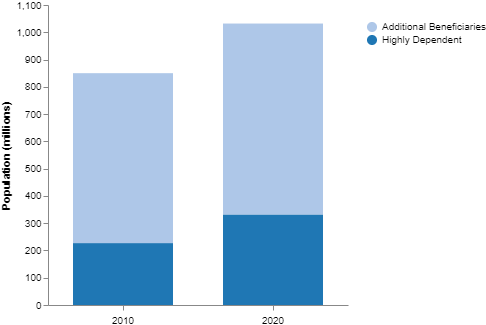

In [5]:
spec=json.loads("""
{
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT year AS x, population AS y, CASE WHEN type='pop_30km-reef_10km-shore' THEN 'Highly Dependent' WHEN type='pop_100km-reef' THEN 'Additional Beneficiaries' END AS c FROM ocn_dash_gcrp_01_population_near_reefs",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "stack",
          "groupby": [
            "x"
          ],
          "sort": {
            "field": "c",
            "order": "descending"
          },
          "field": "y"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "band",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": [
        "#AEC7E8",
        "#1F77B4"
      ],
      "domain": [
        "Additional Beneficiaries",
        "Highly Dependent"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 10,
      "ticks": true,
      "encode": {
        "labels": {
          "update": {
            "angle": {
              "value": 0
            },
            "align": {
              "value": "center"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "title": "Population (millions)",
      "orient": "left",
      "scale": "y",
      "zindex": 0,
      "labelOverlap": "parity"
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {"data": "table"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "x", "offset": 25},
          "width": {"scale": "x", "band": 1, "offset": -50},
          "y": {"scale": "y", "field": "y0"},
          "y2": {"scale": "y", "field": "y1"},
          "fill": {"scale": "color", "field": "c"}
        },
        "update": {
          "fillOpacity": {"value": 1}
        },
        "hover": {
          "tooltip": {
            "fillOpacity": {"value": 0.5},
            "signal": "{'Group':(datum.c),'Population':(datum.y)+' million'}"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "",
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vegaview=dict(spec)
Vega(vegaview)

### Resource Watch specification
API ID: d3be43cc-8bf8-42f8-bc95-97530da07c84  
https://resourcewatch.org/embed/widget/d3be43cc-8bf8-42f8-bc95-97530da07c84

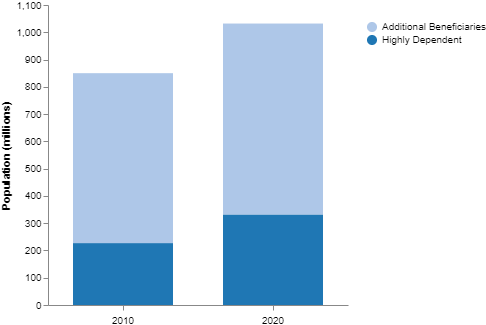

In [7]:
spec=json.loads("""
{
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "width": 300,
  "height": 300,
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT year AS x, population AS y, CASE WHEN type='pop_30km-reef_10km-shore' THEN 'Highly Dependent' WHEN type='pop_100km-reef' THEN 'Additional Beneficiaries' END AS c FROM ocn_dash_gcrp_01_population_near_reefs&rw=&env=production&language=en&page[size]=999&rw=&env=production&language=en&page[size]=999&rw=&env=production&language=en&page[size]=999&rw=&env=production&language=en&page[size]=999&rw=&env=production&language=en&page[size]=999&rw=&env=production&language=en&page[size]=999&rw=&env=production&language=en&page[size]=999",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "stack",
          "groupby": [
            "x"
          ],
          "sort": {
            "field": "c",
            "order": "descending"
          },
          "field": "y"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "band",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y1"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": [
        "#AEC7E8",
        "#1F77B4"
      ],
      "domain": [
        "Additional Beneficiaries",
        "Highly Dependent"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelOverlap": "parity",
      "labelPadding": 10,
      "ticks": true,
      "encode": {
        "labels": {
          "update": {
            "angle": {
              "value": 0
            },
            "align": {
              "value": "center"
            },
            "baseline": {
              "value": "middle"
            }
          }
        }
      }
    },
    {
      "title": "Population (millions)",
      "orient": "left",
      "scale": "y",
      "zindex": 0,
      "labelOverlap": "parity"
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x",
            "offset": 25
          },
          "width": {
            "scale": "x",
            "band": 1,
            "offset": -50
          },
          "y": {
            "scale": "y",
            "field": "y0"
          },
          "y2": {
            "scale": "y",
            "field": "y1"
          },
          "fill": {
            "scale": "color",
            "field": "c"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        },
        "hover": {
          "tooltip": {
            "fillOpacity": {
              "value": 0.5
            },
            "signal": "{'Group':(datum.c),'Population':(datum.y)+' million'}"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "",
      "fill": "color",
      "orient": "right"
    }
  ],
  "config": {
    "name": "user-custom"
  }
}
""")
vegaview=dict(spec)
Vega(vegaview)